In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob

In [2]:
cloudy=glob('cloudy/*.jpg')[:1100]
desert=glob('desert/*.jpg')[:1100]
green_area=glob('green_area/*.jpg')[:1100]
water=glob('water/*.jpg')[:1100]

In [3]:
classes={0:'Cloudy',1:'Desert',2:'Green Area',3:'Water'}

In [4]:
images=[]
labels=[]

for i in cloudy:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in water:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

In [5]:
from sklearn.utils import shuffle

In [6]:
images,labels=shuffle(images,labels)

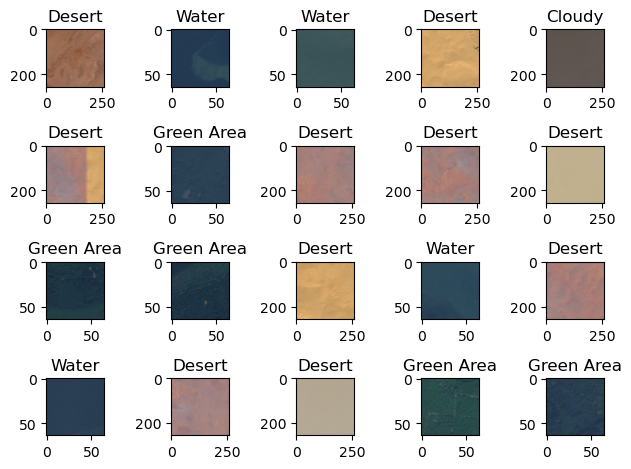

In [7]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [8]:
from skimage.transform import resize

In [9]:
x=[]

for i in images:
    x.append(resize(i,(64,64,3)))

In [10]:
y=labels

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [14]:
x_train.shape

(3080, 64, 64, 3)

In [15]:
x_test.shape

(1320, 64, 64, 3)

In [16]:
from tensorflow.keras import layers,Sequential

In [17]:
model =Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(4, activation = 'sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=5,validation_split=0.05)

Epoch 1/5
92/92 [==============================] - 12s 110ms/step - loss: 0.4443 - accuracy: 0.7813 - val_loss: 0.2267 - val_accuracy: 0.8766
Epoch 2/5
92/92 [==============================] - 10s 109ms/step - loss: 0.1987 - accuracy: 0.9238 - val_loss: 0.1754 - val_accuracy: 0.9156
Epoch 3/5
92/92 [==============================] - 11s 118ms/step - loss: 0.2353 - accuracy: 0.8944 - val_loss: 0.2334 - val_accuracy: 0.9091
Epoch 4/5
92/92 [==============================] - 10s 110ms/step - loss: 0.1524 - accuracy: 0.9385 - val_loss: 0.1838 - val_accuracy: 0.9416
Epoch 5/5
92/92 [==============================] - 10s 108ms/step - loss: 0.1601 - accuracy: 0.9313 - val_loss: 0.1766 - val_accuracy: 0.9416


In [23]:
model.evaluate(x_train,y_train)

97/97 [==============================] - 3s 32ms/step - loss: 0.1569 - accuracy: 0.9328


[0.15689894556999207, 0.9327921867370605]

In [24]:
y_pred=model.predict(x_test)

42/42 [==============================] - 2s 36ms/step


In [25]:
y_pred

array([[7.6599712e-03, 1.8130774e-02, 9.9854302e-01, 9.7682631e-01],
       [2.9012477e-02, 9.6562486e-03, 9.9343795e-01, 9.9787629e-01],
       [1.6342245e-02, 5.0858772e-01, 9.8392457e-01, 9.9994475e-01],
       ...,
       [9.9166644e-01, 1.0000000e+00, 2.2542130e-04, 9.9999970e-01],
       [1.0000000e+00, 1.5243258e-01, 4.1083602e-04, 9.7660935e-01],
       [9.9999982e-01, 1.2733800e-04, 2.7378445e-02, 4.8222512e-01]],
      dtype=float32)

In [26]:
predicted=[np.argmax(i) for i in y_pred]

In [27]:
predicted

[2,
 3,
 3,
 1,
 1,
 0,
 1,
 2,
 0,
 3,
 0,
 3,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 3,
 1,
 3,
 3,
 0,
 1,
 3,
 1,
 1,
 2,
 3,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 0,
 2,
 2,
 3,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 3,
 3,
 0,
 3,
 1,
 2,
 3,
 0,
 2,
 0,
 1,
 3,
 0,
 1,
 2,
 0,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 2,
 0,
 0,
 3,
 3,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 3,
 2,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 2,
 2,
 3,
 0,
 0,
 1,
 3,
 3,
 1,
 1,
 0,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 0,
 1,
 3,
 0,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 0,
 0,
 1,
 3,
 2,
 2,
 2,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 0,
 3,
 1,
 3,
 0,
 3,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 3,
 3,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 0,
 3,
 1,
 3,
 0,
 2,
 1,
 3,
 1,
 2,


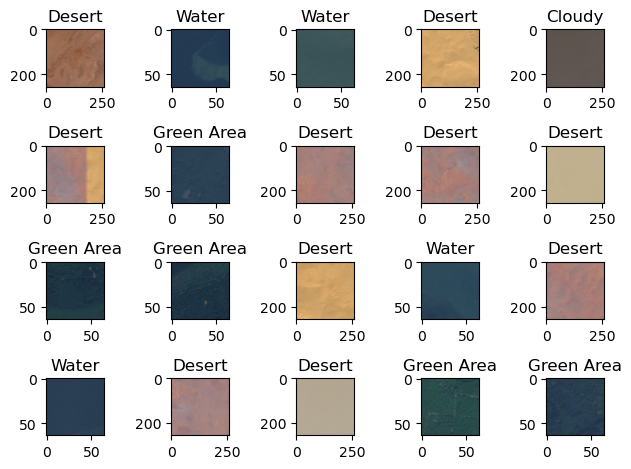

In [35]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
accuracy_score(y_test,predicted)

0.928030303030303

In [30]:
confusion_matrix(y_test,predicted)

array([[309,   0,   0,   0],
       [  0, 347,   0,   0],
       [  0,   0, 267,  60],
       [  0,   5,  30, 302]], dtype=int64)

<AxesSubplot:>

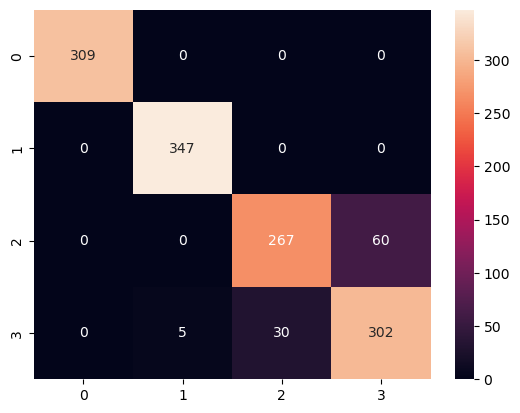

In [33]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [34]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       0.99      1.00      0.99       347
           2       0.90      0.82      0.86       327
           3       0.83      0.90      0.86       337

    accuracy                           0.93      1320
   macro avg       0.93      0.93      0.93      1320
weighted avg       0.93      0.93      0.93      1320

